In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from numpy.fft.helper import fftshift
from scipy import signal
from scipy.signal import convolve


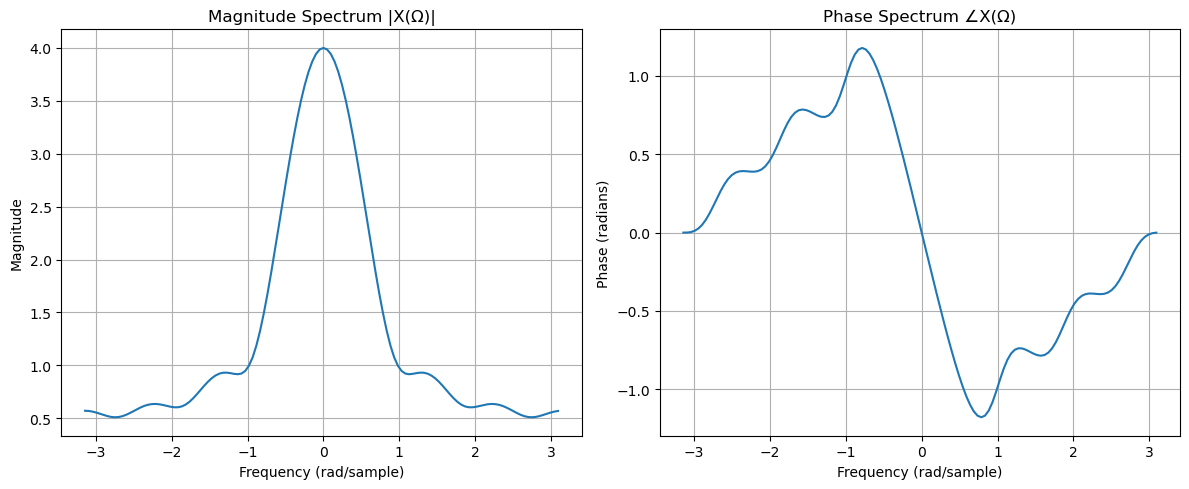

In [3]:
#A1)
# function to generate unit step u[n-a]
# a is the delay (enter '-a' for advance)
def u(a, n):
 unit = np.array([])
 for sample in n:
    if sample<a:
        unit = np.append(unit,0)
    else:
        unit = np.append(unit,1)
 return(unit)

# A. Discrete-Time Fourier Transform (DTFT)
#1)
n = np.arange(0,128)
Omega_0 = (2*np.pi/128) * np.arange(-64,64)
x = np.append(np.ones(7),np.zeros(121))
x = x*((-1/7)*n + 1)

X_r = fft(x)
X_r_mag = fftshift(np.abs(X_r))
X_r_angle = fftshift(np.angle(X_r ))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(Omega_0, X_r_mag)
plt.title('Magnitude Spectrum |X(Ω)|')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(Omega_0, X_r_angle)
plt.title('Phase Spectrum ∠X(Ω)')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Phase (radians)')
plt.grid(True)
plt.tight_layout()
plt.show()

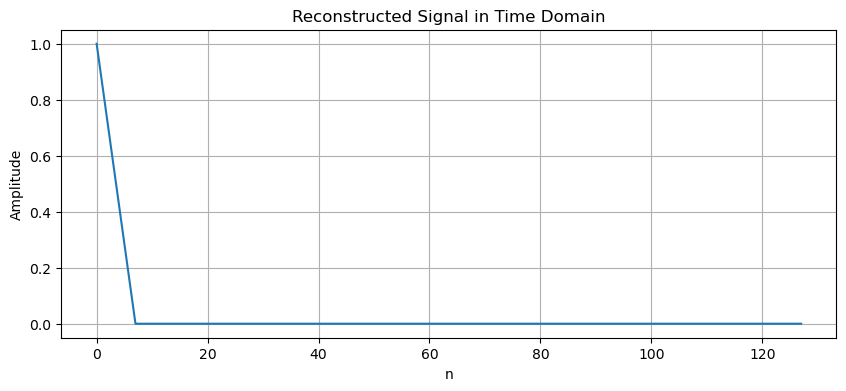

In [5]:
#A3
def u(a, n):
    unit = np.array([])
    for sample in n:
        if sample < a:
            unit = np.append(unit, 0)
        else:
            unit = np.append(unit, 1)
    return unit


n = np.arange(0, 128)
Omega_0 = (2 * np.pi / 128) * np.arange(-64, 64)
x = np.append(np.ones(7), np.zeros(121))
x = x * ((-1/7) * n + 1)

X_r = fft(x)
X_r_mag = fftshift(np.abs(X_r))
X_r_angle = fftshift(np.angle(X_r))

x_reconstructed = ifft(X_r).real

plt.figure(figsize=(10, 4))

plt.plot(n, x_reconstructed, label='Reconstructed Signal')
plt.title('Reconstructed Signal in Time Domain')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

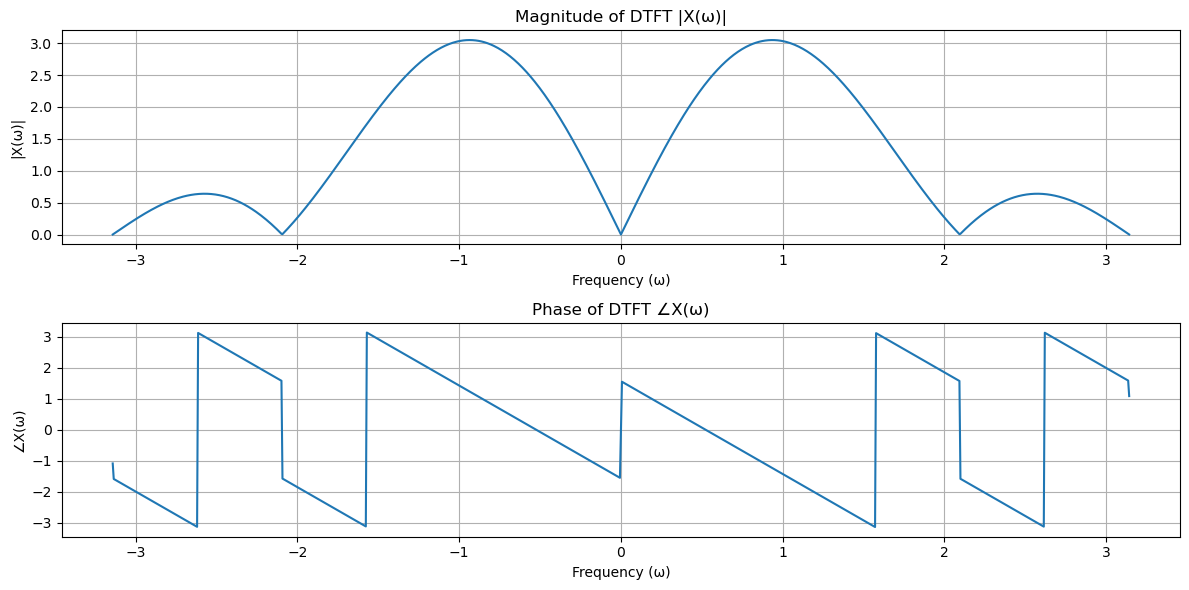

In [2]:
#B1
S = 5 #from student number 
n = np.arange(0, S + 1)  
x = np.sin(2 * np.pi * n / (S + 1))  

omega = np.linspace(-np.pi, np.pi, 1001)
W_omega = np.exp(-1j * np.outer(n, omega))  
X = np.dot(x, W_omega)  

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(X))
plt.title("Magnitude of DTFT |X(ω)|")
plt.xlabel("Frequency (ω)")
plt.ylabel("|X(ω)|")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(omega, np.angle(X))
plt.title("Phase of DTFT ∠X(ω)")
plt.xlabel("Frequency (ω)")
plt.ylabel("∠X(ω)")
plt.grid()
plt.tight_layout()
plt.show()

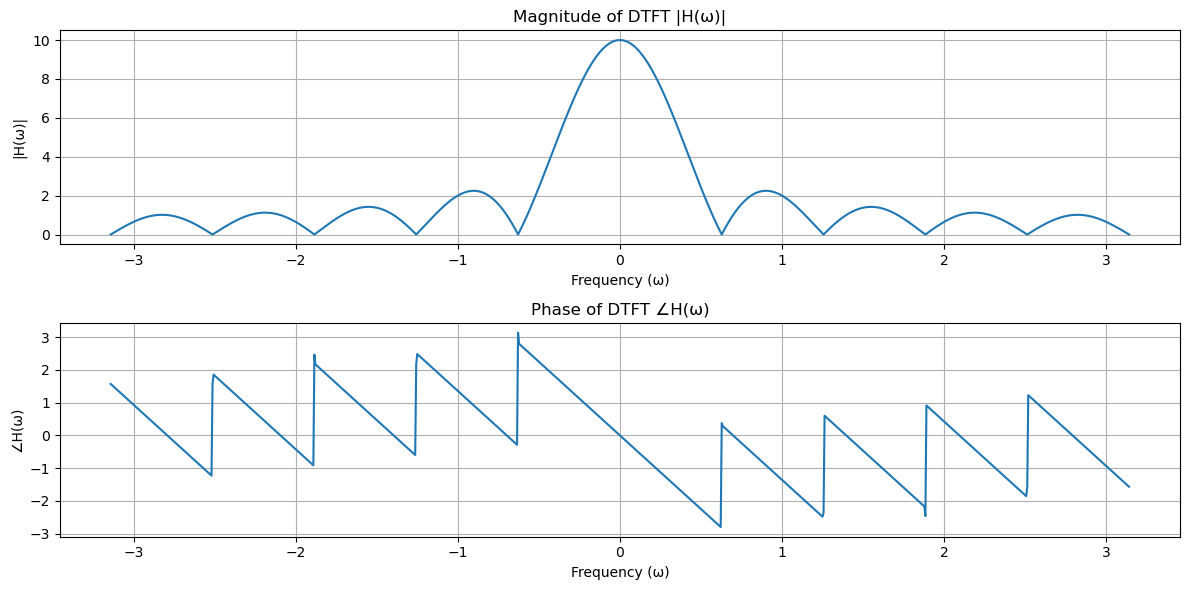

In [3]:
#B2
n = np.arange(0, 10)  
h = np.ones_like(n)   


omega = np.linspace(-np.pi, np.pi, 1001)
W_omega = np.exp(-1j * np.outer(n, omega))  
H = np.dot(h, W_omega)  


plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(H))
plt.title("Magnitude of DTFT |H(ω)|")
plt.xlabel("Frequency (ω)")
plt.ylabel("|H(ω)|")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(omega, np.angle(H))
plt.title("Phase of DTFT ∠H(ω)")
plt.xlabel("Frequency (ω)")
plt.ylabel("∠H(ω)")
plt.grid()

plt.tight_layout()
plt.show()

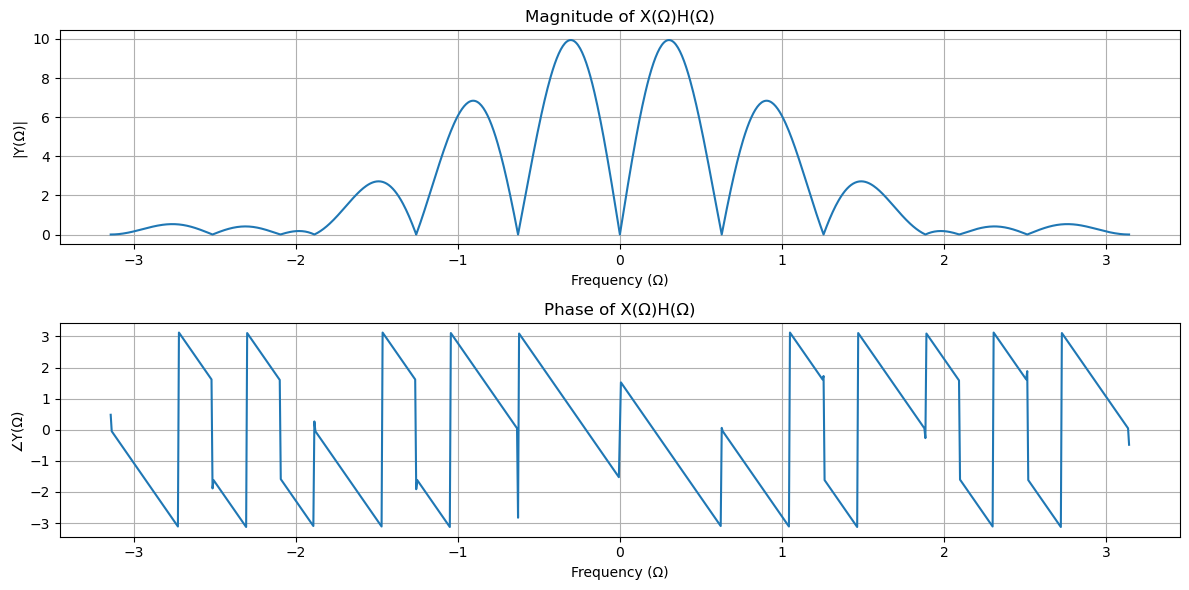

In [4]:
#B3
S = 5

n_x = np.arange(0, S + 1)  
x = np.sin(2 * np.pi * n_x / (S + 1))  

n_h = np.arange(0, 10) 
h = np.ones_like(n_h)    
omega = np.linspace(-np.pi, np.pi, 1001)

W_omega_x = np.exp(-1j * np.outer(n_x, omega)) 
X = np.dot(x, W_omega_x)  


W_omega_h = np.exp(-1j * np.outer(n_h, omega))  
H = np.dot(h, W_omega_h) 
Y = X * H

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(Y))
plt.title("Magnitude of X(Ω)H(Ω)")
plt.xlabel("Frequency (Ω)")
plt.ylabel("|Y(Ω)|")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(omega, np.angle(Y))
plt.title("Phase of X(Ω)H(Ω)")
plt.xlabel("Frequency (Ω)")
plt.ylabel("∠Y(Ω)")
plt.grid()

plt.tight_layout()
plt.show()

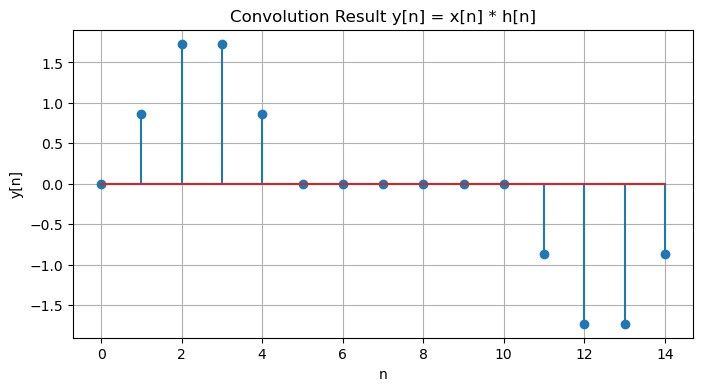

In [8]:
#B4
S = 5
n_x = np.arange(0, S + 1)  
x = np.sin(2 * np.pi * n_x / (S + 1))  

n_h = np.arange(0, 10)  
h = np.ones_like(n_h)    


y = convolve(x, h, mode='full')
n_y = np.arange(0, len(y))

plt.figure(figsize=(8, 4))
plt.stem(n_y, y)
plt.title("Convolution Result y[n] = x[n] * h[n]")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid()
plt.show()

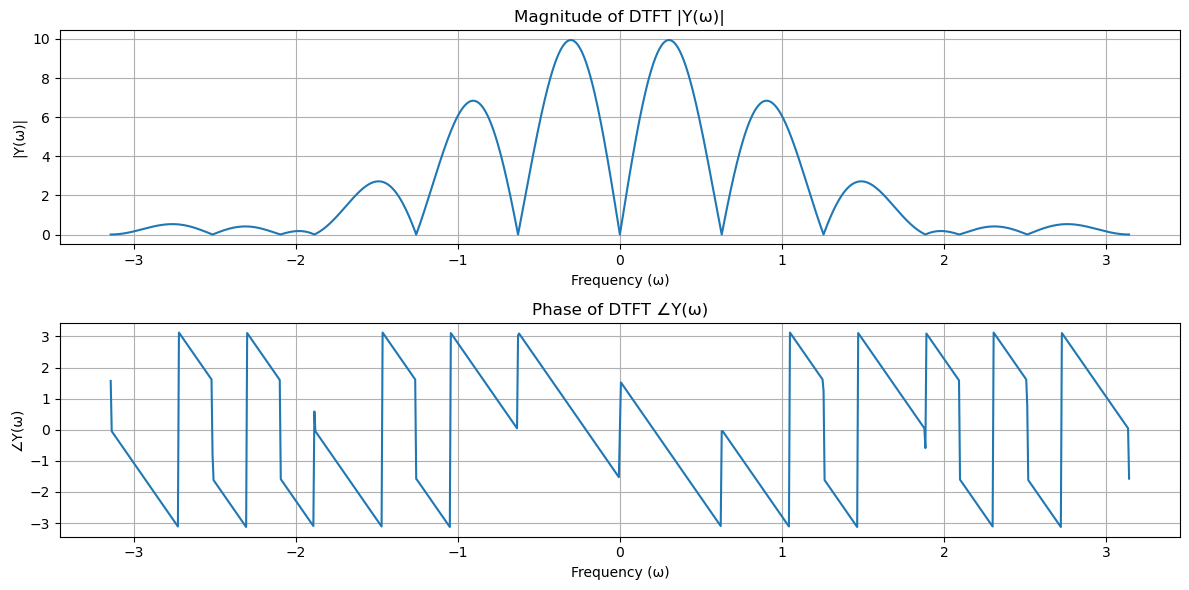

In [9]:
#B5
S = 5

n_x = np.arange(0, S + 1)  
x = np.sin(2 * np.pi * n_x / (S + 1)) 

n_h = np.arange(0, 10) 
h = np.ones_like(n_h)   


y = convolve(x, h, mode='full')
n_y = np.arange(0, len(y))

omega = np.linspace(-np.pi, np.pi, 1001)
W_omega_y = np.exp(-1j * np.outer(n_y, omega))  
Y = np.dot(y, W_omega_y)  

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(Y))
plt.title("Magnitude of DTFT |Y(ω)|")
plt.xlabel("Frequency (ω)")
plt.ylabel("|Y(ω)|")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(omega, np.angle(Y))
plt.title("Phase of DTFT ∠Y(ω)")
plt.xlabel("Frequency (ω)")
plt.ylabel("∠Y(ω)")
plt.grid()

plt.tight_layout()
plt.show()

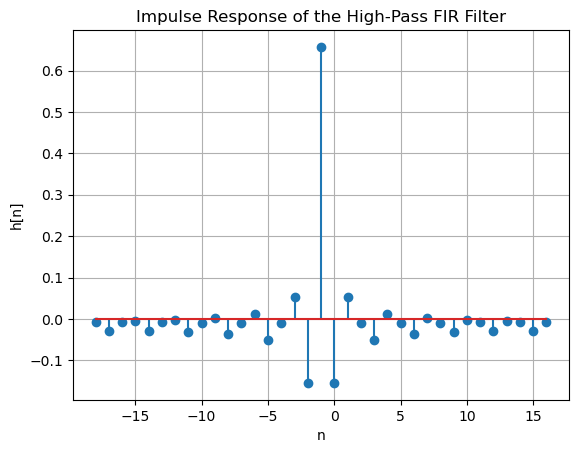

In [11]:
#C1
N = 35 
cutoff_frequency = 2 * np.pi / 3 

H = np.zeros(N, dtype=complex)
for i in range(N):
    omega = 2 * np.pi * i / N
    if omega > cutoff_frequency:
        H[i] = 1
    else:
        H[i] = 0


h = np.real(ifft(H))
h = np.fft.fftshift(h)


plt.stem(np.arange(-N//2, N//2), h)
plt.title('Impulse Response of the High-Pass FIR Filter')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)
plt.show()

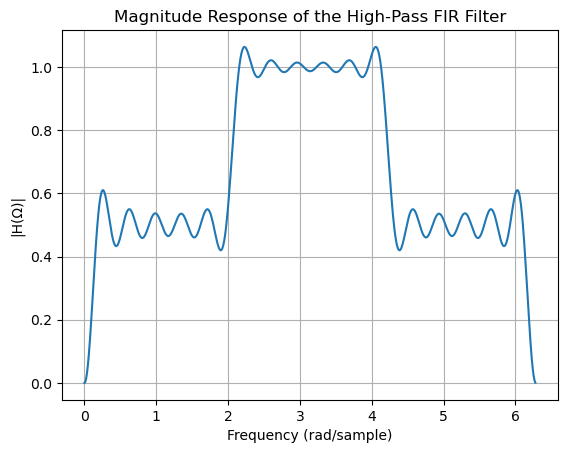

In [12]:
#C2
N = 35  
cutoff_frequency = 2 * np.pi / 3  

w, H = signal.freqz(h, 1, worN=np.arange(0, 2 * np.pi, 2 * np.pi / 1001))

plt.plot(w, np.abs(H))
plt.title('Magnitude Response of the High-Pass FIR Filter')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('|H(Ω)|')
plt.grid(True)
plt.show()

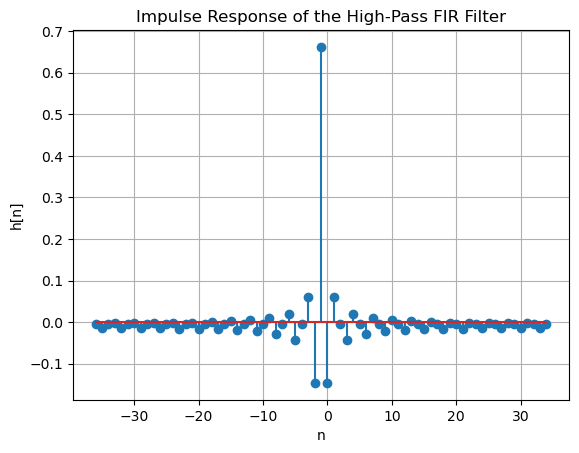

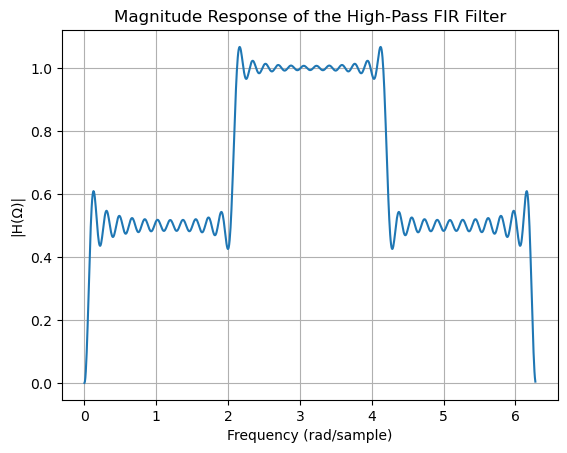

In [16]:
#C4
N = 71  
cutoff_frequency = 2 * np.pi / 3  

H = np.zeros(N, dtype=complex)
for i in range(N):
    omega = 2 * np.pi * i / N
    if omega > cutoff_frequency:
        H[i] = 1
    else:
        H[i] = 0

h = np.real(ifft(H))
h = np.fft.fftshift(h)

plt.stem(np.arange(-N//2, N//2), h)
plt.title('Impulse Response of the High-Pass FIR Filter')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)
plt.show()

cutoff_frequency = 2 * np.pi / 3  
w, H = signal.freqz(h, 1, worN=np.arange(0, 2 * np.pi, 2 * np.pi / 1001))

plt.plot(w, np.abs(H))
plt.title('Magnitude Response of the High-Pass FIR Filter')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('|H(Ω)|')
plt.grid(True)
plt.show()